<h1 align='center'> <b> TWITTER US AIRLINE SENTIMENT ANALYSIS - PHÂN TÍCH THÁI ĐỘ HÀNH KHÁCH ĐỐI VỚI CÁC HÃNG MÁY BAY TẠI MỸ DỰA TRÊN BỘ DỮ LIỆU TWITTER </b> </h1>


Nguồn bộ dữ liệu : [Kaggle](https://www.kaggle.com/datasets/crowdflower/twitter-airline-sentiment?select=Tweets.csv)


**Thành viên thực hiện**

*   20280010: Phạm Bảo Cương 
*   20280053: Cao Huỳnh Anh Khoa
*   20280057: Phan Tiến Kỳ
*   20280099: Trần Minh Tiến





**Tổng quan dự án** <br>
 

1. Load The Data  - Tải dữ liệu
2. EDA - Phân tích dữ liệu tổng quan
3. Data Visualization - Trực quan hoá dữ liệu
4. Text Preprocessing and Cleaning - Tiền xử lý dữ liệu văn bản
5. Handling Imbalance & Model Building - Xử lý mất cân bằng dữ liệu & Huấn luyện mô hình
6. Visualize model performance - Đánh giá độ chính xác mô hình
7. Tổng kết 



<p align='center'><img src='https://cdn.dribbble.com/users/846207/screenshots/7617197/media/e87a923768846bc12f00539d66e80931.gif' width="600" height ='400' /></p>

#**1. LOAD THE DATASET**

**Thêm những thư viện cần thiết**

In [ ]:
#Essential libraries
import pandas as pd
import numpy as np

#Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
import urllib.request

#Data cleaning
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.preprocessing import LabelEncoder

#Modeling
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split,RandomizedSearchCV,GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

#Model performance evaluation 
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score

**Chú thích các thư viện:** 
* **Essential libraries:**
  * pandas: một thư viện mã nguồn mở, hỗ trợ đắc lực trong phân tích và xử lý dữ liệu.
  * numpy: một thư viện toán học phổ biến, cho phép làm việc hiệu quả với ma trận và mảng.

* **Data Viusalization:**
  * matplotlib: một thư viện toàn diện để tạo các hình ảnh trực quan tĩnh, động và tương tác. 
  * seaborn: một thư viện trực quan hóa dựa trên matplotlib. Nó cung cấp một giao diện cấp cao để vẽ đồ họa thống kê đẹp và mang nhiều thông tin.
  * wordCloud: một thư viện để tạo đám mây từ các từ.
  * ImageColorGenerator: một mô đun dùng để tạo màu cho từ dựa trên hình ảnh RGB.
  * Image: một module cung cấp các chức năng tải hình ảnh từ tệp và tạo hình ảnh mới.
  * urlib.request: một module được sử dụng chủ yếu cho việc mở và lấy URL.

* **Data Cleaning:**
  * re: một thư viện biểu thức chính quy.
  * nltk:một bộ thư viện cho phép thực hiện Xử lý ngôn ngữ tự nhiên (NLP).
  * stopwords: một bộ các từ xuất hiện nhiều lần và không có đóng góp nhiều vào ý nghĩa của câu.
  * LabelEcoder: một class dùng để mã hóa các nhãn đích có giá trị từ 0 đến n_classes-1

* **Modeling:**
  * SMOTE: được sử dụng để xử lí việc cân bằng dữ liệu.
  * train_test_split: được sử dụng để chia mảng hoặc ma trận thành các tập con train và test ngẫu nhiên.
  * RandomizedSearchCV: một chức năng được sử dụng để tìm các tham số tối ưu.
  * TfidVectorizer: được sử dụng để chuyển một bộ dữ liệu thô thành một ma trận có các tính năng TF-IDF.
  * RandomForestClassifer: được sử dụng để làm việc với thuật toán Random Forests.


* **Model Performance Evaluation:**
  * classification_report: được sử dụng để xây dựng một số liệu đánh giá hiệu suất trong học máy.
  * confusion_matrix: được sử dụng để xây dựng một ma trận được sử dụng để đánh giá hiệu suất của một mô hình phân loại.
  * accuracy_score: được sử dụng để so sánh tập hợp các nhãn được dự đoán cho một mẫu phải khớp chính xác với tập hợp các nhãn tương ứng trong y_true.










Đọc dữ liệu file csv vào biến **tweet_dat**.

In [ ]:
url = 'https://raw.githubusercontent.com/tientran0826/Twitter_US_Airline_Sentiment_Analysis/main/Tweets.csv'

Nguồn của bộ Dataset: Kaggle <br>
Chi tiết thông tin:
*   Tên dataset: Twitter US Airline Sentiment - 
Analyze how travelers in February 2015 expressed their feelings on Twitter 
*  Link: https://www.kaggle.com/datasets/crowdflower/twitter-airline-sentiment

In [ ]:
tweet_dat = pd.read_csv(url)

Trả về 5 dòng đầu tiên để kiểm tra nhanh các đối tượng có đúng kiểu dữ liệu trong đó hay không?

In [ ]:
tweet_dat.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


Trả về 5 dòng cuối cùng để kiểm tra nhanh các đối tượng có đúng kiểu dữ liệu trong đó hay không?

In [ ]:
tweet_dat.tail()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)
14639,569587140490866689,neutral,0.6771,NaN,0.0000,American,NaN,daviddtwu,NaN,0,@AmericanAir we have 8 ppl so we need 2 know h...,NaN,2015-02-22 11:58:51 -0800,"dallas, TX",NaN


* Giải thích các features:           
  * **airline_sentiment**: mức độ hài lòng về hãng hàng không.
  * **negativereason**: nguyên nhân khiến hành khách không hài lòng về hãng hàng không.  
  * **text**: nội dung của bài tweet (review). 
  * airline: tên của hãng hàng không.
  * name: tên của người dùng (hành khách). 
  * tweet_id, tweet_coord, tweet_created, tweet_location: mã id, tọa độ, ngày tháng năm, vị trí của bài tweet.  
  * retweet_count: số lượng re-tweet.
  * airline_sentiment_confidence, negativereason_confidence: mức độ tin cậy khi gán dãn mức độ hài lòng, nguyên nhân không hài lòng.      
  * user_timezone: múi giờ của người dùng (hành khách).


#**2. EDA (Exploratory Data Analysis)**

##**2.1 Phân tích dữ liệu tổng quát, kiểu dữ liệu, số cột (features) và số dòng dữ liệu (samples)**

In [ ]:
tweet_dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

* Dataframe có 14640 dòng và 15 cột.
* Các features tương ứng với các kiểu dữ liệu:
  * **int64** (2): tweet_id, retweet_count.
  * **float64** (2): airline_sentiment_confidence, negativereason_confidence.
  * **object** (11): negativereason, airline, airline_sentiment_gold, name, negativereason_gold, text, tweet_coord, tweet_created, tweet_location, user_timezone.
* Có một vài features có giá trị non-null ít như: airline_sentiment_gold, negativereason_gold, còn lại tương đối ổn.
* Bộ nhớ được sử dụng: trên 1.7 MB


In [ ]:
tweet_dat.shape

(14640, 15)

Dữ liệu có 14640 samples và 15 features

##**2.2 Kiểm tra Missing Value**

In [ ]:
100*tweet_dat.isna().sum()/len(tweet_dat.index)

tweet_id                         0.000000
airline_sentiment                0.000000
airline_sentiment_confidence     0.000000
negativereason                  37.308743
negativereason_confidence       28.128415
airline                          0.000000
airline_sentiment_gold          99.726776
name                             0.000000
negativereason_gold             99.781421
retweet_count                    0.000000
text                             0.000000
tweet_coord                     93.039617
tweet_created                    0.000000
tweet_location                  32.329235
user_timezone                   32.923497
dtype: float64

airline_sentiment_gold, negativereason_gold và tweet_coord có hơn 90% giá trị NULL 

#**3. DATA VISUALIZATION**

**Cài đặt theme `whitegrid` cho seaborn**

In [ ]:
sns.set_theme(style = "whitegrid")

##**3.1 Biểu đồ tròn minh họa tỉ lệ phần trăm của các cảm xúc positive, negative, neutral**

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64


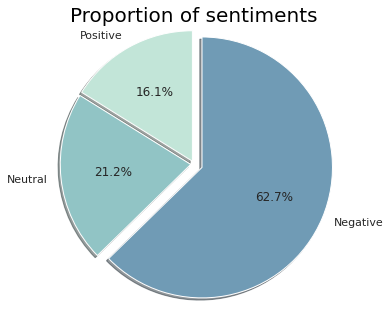

In [ ]:
print(tweet_dat.airline_sentiment.value_counts())

color = sns.cubehelix_palette(start=.5, rot=-.5)
plt.figure(figsize=(5, 5))
plt.pie(x = tweet_dat.airline_sentiment.value_counts().sort_values(),  
        labels = ["Positive", "Neutral", "Negative"],
        colors = color, 
        autopct = '%1.1f%%', 
        shadow = True,
        radius = 1.2,
        startangle = 90,
        explode = [0.03, 0.03, 0.08])
plt.title("Proportion of sentiments",
          fontsize = 20, 
          color = "black")
plt.show()

* Phần lớn hành khách có cảm xúc **negative**, nhiều gấp khoảng lần lượt **4** và **3** lần so với cảm xúc **positive** và **neutral**.

* Đặc biệt, việc tồn tại sự mất cân bằng cao như vậy có thể ảnh hưởng đến quá trình training model và làm cho model trở nên không hiệu quả. Vì thế chúng ta cần phải sử dụng một vài kỹ thuật để khắc phục hạn chế này ở phần **tiền xử lí dữ liệu (preprocessing)**.

##**3.2 Biểu đồ cột (ngang) minh họa *số lượng tweets* của mỗi hãng hàng không**

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64


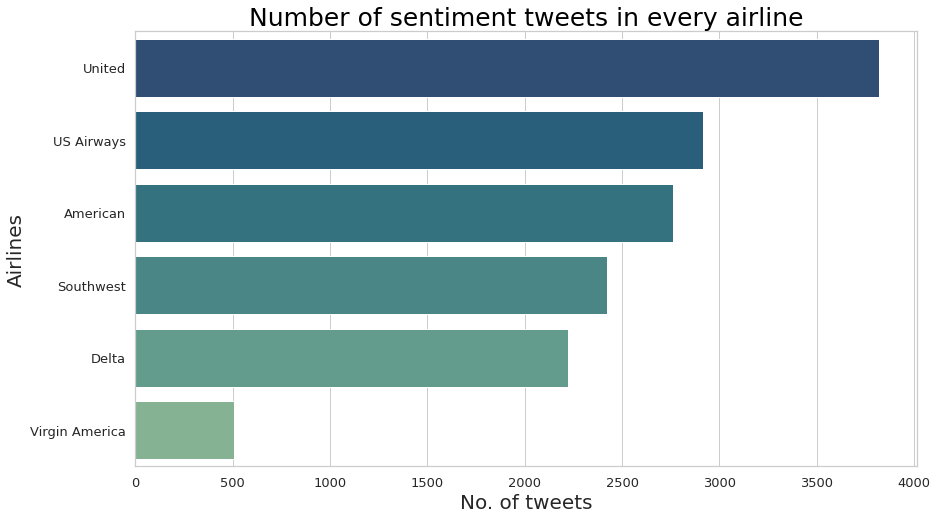

In [ ]:
print(tweet_dat['airline'].value_counts(ascending = False))

plt.figure(figsize = (14, 8))
sns.countplot(data = tweet_dat, y = "airline",
              order = tweet_dat['airline'].value_counts(ascending = False).index,
              palette = "crest_r")
plt.title("Number of sentiment tweets in every airline",
          fontsize = 25, 
          color = "black")
plt.xticks(size = 13)
plt.yticks(size = 13)
plt.xlabel("No. of tweets", fontsize = 20)
plt.ylabel("Airlines", fontsize = 20);

* *United* đứng đầu các hãng bay với khoảng 3800 tweets , theo sau là *US Airways, American, ...*
* Thấp nhất đó là Virgin America chỉ có khoảng 500 tweets.

##**3.3 Biểu đồ cột (ngang) thể hiện số lượng của mỗi *reason negative tweets* của mỗi hãng hàng không**

Customer Service Issue         2910
Late Flight                    1665
Can't Tell                     1190
Cancelled Flight                847
Lost Luggage                    724
Bad Flight                      580
Flight Booking Problems         529
Flight Attendant Complaints     481
longlines                       178
Damaged Luggage                  74
Name: negativereason, dtype: int64


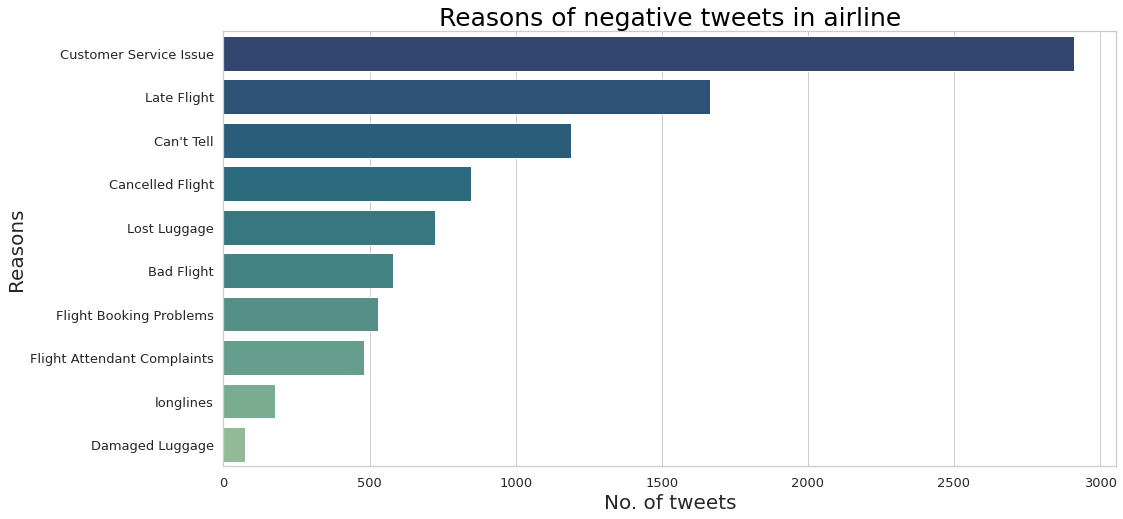

In [ ]:
print(tweet_dat['negativereason'].value_counts(ascending = False))

plt.figure(figsize = (16, 8))
sns.countplot(data = tweet_dat, y = "negativereason",
              order = tweet_dat['negativereason'].value_counts(ascending = False).index,
              palette = "crest_r")
plt.title("Reasons of negative tweets in airline",
          fontsize = 25, 
          color = "black")
plt.xticks(size = 13)
plt.yticks(size = 13)
plt.xlabel("No. of tweets", fontsize = 20)
plt.ylabel("Reasons", fontsize = 20);

* *Customer Service Issue* là nguyên chính khiến hành khách có cảm xúc **negative**. 
* Bên cạnh đó, *Late night, Cancelled Flight, Lost Luggage, ...* cũng làm cho hành khách không hài lòng về hãng hàng không.

## **3.4 Wordcloud thể hiện tần số xuất hiện các từ nhiều nhất trong text.**


**Wordcloud là hình ảnh biểu diễn tần suất xuất hiện của các từ dưới dạng đồ họa, qua đó làm nổi bật các từ xuất hiện thường xuyên hơn trong (các) văn bản gốc. Từ trong hình ảnh càng lớn thì từ đó càng phổ biến và có ý nghĩa quan trọng.**

Ngoài ra dưới đây ta còn đề cập đến **Stop Words** , là những từ xuất hiện nhiều trong ngôn ngữ tự nhiên, tuy nhiên lại không mang nhiều ý nghĩa. Ở tiếng việt StopWords là những từ như: để, này, kia... Tiếng anh là những từ như: is, that, this...  . 

In [ ]:
np.array(STOPWORDS)

array({'no', 'not', 'above', 'so', 'a', 'same', 'at', "she's", "he's", 'http', 'be', 'since', 'has', 'off', 'yourself', 'doing', 'and', 'by', "he'd", "they'll", "i'll", 'each', "there's", 'having', 'about', "weren't", 'over', 'myself', 'that', 'them', "she'll", 'otherwise', 'their', 'else', 'hers', 'below', 'cannot', 'am', "won't", 'as', 'herself', "who's", 'just', 'my', "you'd", "you'll", 'have', 'our', "they're", "let's", 'up', "they'd", 'here', 'whom', 'does', "can't", 'me', "she'd", 'who', "hasn't", 'once', "what's", 'shall', 'to', 'after', "you've", 'all', 'out', 'any', 'where', "wouldn't", 'ourselves', 'those', 'she', "when's", 'against', 'do', 'ours', 'we', 'could', 'nor', 'then', "they've", 'r', 'him', 'been', 'why', 'further', 'if', 'when', "mustn't", 'between', 'can', "why's", 'these', "it's", "we're", 'other', 'down', 'themselves', 'get', 'being', "couldn't", "wasn't", "here's", "i'd", "how's", 'during', 'however', "isn't", 'too', 'more', "i'm", 'did', 'it', 'theirs', 'of', 

**Tài liệu**: [Click](https://www.geeksforgeeks.org/generating-word-cloud-python/)

###**Wordcloud thể hiện tần số các từ xuất hiện nhiều nhất trong các *text(review)* của những cảm xúc *positive***

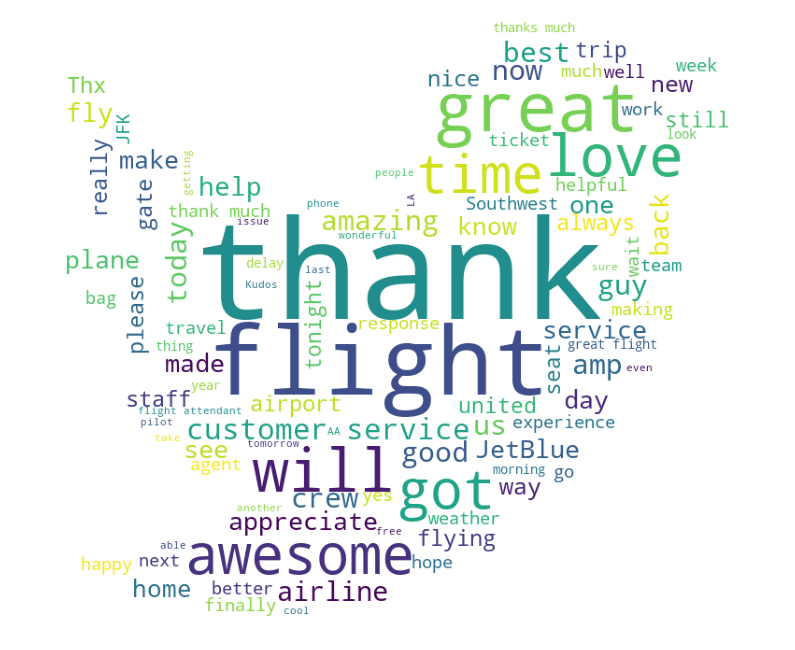

In [ ]:
new_positive_tweet_dat = tweet_dat[tweet_dat["airline_sentiment"] == "positive"]
words = " ".join(new_positive_tweet_dat["text"])
cleaned_word = " ".join([word for word in words.split()
                            if "http" not in word
                                and not word.startswith("@")
                                and word != "RT"
                            ])


urllib.request.urlretrieve("https://raw.githubusercontent.com/tientran0826/Twitter_US_Airline_Sentiment_Analysis/main/280960118_553466279642268_778130397253422178_n.png", "twitter.png")
custom_mask = np.array(Image.open("twitter.png"))
wordcloud = WordCloud(stopwords = STOPWORDS,
                      max_words = 100,
                      background_color= "white",
                      #width = 3000,
                      #height = 2500,
                      mask = custom_mask
                     ).generate(cleaned_word)
plt.figure(1, figsize = (14, 12))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

* Hành khách có xu hướng tweet **"Thank, awesome, good, great, love, ..."**  khi họ cảm thấy hài lòng về chuyến bay

###**Wordcloud thể hiện tần suất các từ xuất hiện nhiều nhất trong các *text(review)* của những cảm xúc *negative***

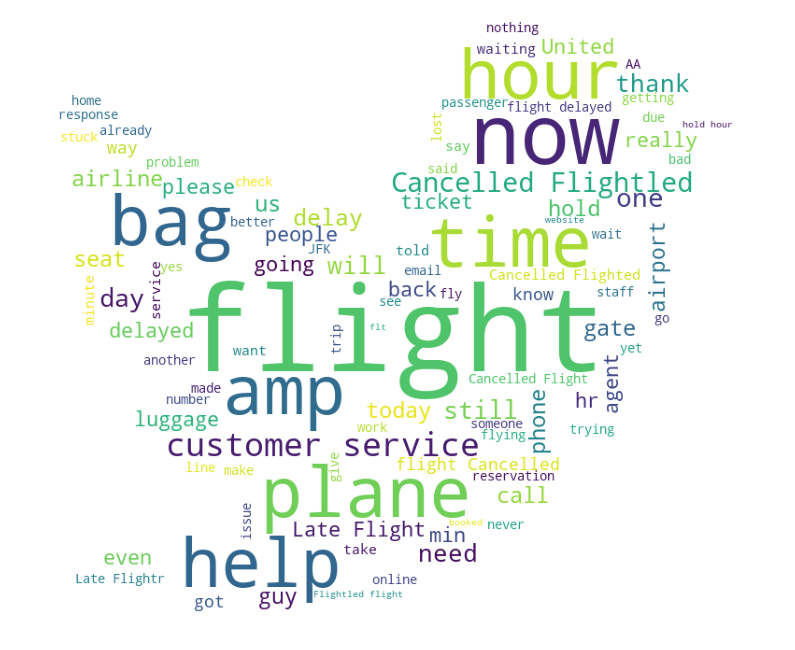

In [ ]:
new_negative_tweet_dat=tweet_dat[tweet_dat["airline_sentiment"] == "negative"]
words = ' '.join(new_negative_tweet_dat["text"])
cleaned_word = " ".join([word for word in words.split()
                            if "http" not in word
                                and not word.startswith("@")
                                and word != "RT"
                            ])

wordcloud = WordCloud(stopwords = STOPWORDS,
                      max_words = 100,
                      background_color= "white",
                      #width = 3000,
                      #height = 2500,
                      mask = custom_mask
                     ).generate(cleaned_word)
plt.figure(1, figsize=(14, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

* Ngược lại, **"flight, time, hour, bag, customer service, cancelled flighted, ..."**  là các từ mà hành khách sử dụng nhiều nhất trong **negative tweets**.
* Đặc biệt, xuất hiện nhiều chữ liên quan đến thời gian **"time, hour, now, ..."**  vì lý do "Late flight" hay "Cancelled flight"

#**4. TEXT PREPROCESSING AND CLEANING**

##**4.1 Xác định yêu cầu của bài toán**
Vì mục đích của chúng ta khi xây dựng bài toán là phân tích thái độ người dùng đối với các hãng bay nên kết quả đầu ra chúng ta là thái độ người dùng. Vậy có thể xác định *airline_sentiment* là Label(nhãn) của bài toán ta hướng đến và bài toán ta cần thực hiện là **Bài toán phân loại**.

In [ ]:
print(tweet_dat['airline_sentiment'].unique())

['neutral' 'positive' 'negative']


**Chọn features cho việc training** \\
Ta có thể thấy bộ dữ liệu ta sử dụng có khá nhiều features , tuy nhiên ta sẽ không sử dụng hết các features này cho việc training vì việc xử lý các giá trị Missing Value cùng lúc sẽ gây tốn kém thêm tài nguyên. Ví dụ khi nhìn vào các features như *tweet_id , name* thì chúng có vẻ không có ý nghĩa trong việc dự đoán thái độ của người dùng với chuyến bay và các features như *airline_sentiment_gold , negativereason_gold ,tweet_coord* có giá trị NULL tương đối lớn (90%). Vì vậy ở đây , dựa vào kinh nghiệm thực tiễn (có thể sử dụng phân tích *Độ tương quan* của các features so với label , tuy nhiên vì có các cột là văn bản nên phương pháp này không phù hợp) , ta chọn ra 2 features có liên quan nhất đến việc dự đoán làm đầu vào cho mô hình là *negativereason (lý do) , text (Nội dung tweet)*. Nếu mô hình cho kết quả không như mong muốn ta có thể quay lại bước này và chọn thêm một số features khác.



**Vì sao cần xử lý preprocessing ?**

Vì các thuật toán trong mô hình máy học thường không thể xử lý tốt các dữ liệu dạng văn bản và các giá trị Missing Values có thể ảnh hưởng đến độ chính xác của mô hình nên ta cần phải tiền xử lý dữ liệu.

##**4.2 Tiền xử lý dữ liệu ( Data Preprocessing)**

Ở đây ta kiểm tra thấy Label thuộc dạng kiểu dữ liệu phân loại (categorical variable) theo dạng có mức độ (ordinal).

In [ ]:
tweet_dat[['airline_sentiment']].head(5)

,airline_sentiment
0,neutral
1,positive
2,neutral
3,negative
4,negative


Ta có thể dễ dàng thấy trong feature *airline_sentiment* có 3 giá trị tương ứng với mức độ hài lòng của người dùng đối với chuyến bay <br>
*   *Positive* : Hài lòng
*   *Neutral* : Trung tính
*   *Negative* : Không hài lòng 






Có thể thực hiện thủ công việc chuyển dữ liệu phân loại thành số tuy nhiên việc chuyển ngược lại thành dữ liệu ban đầu khi cần cho việc Visualization sẽ rất mất thời gian nên ta sẽ nhờ đến sự hỗ trợ của hàm LabelEncoder trong thư viện sk-learn.<br>

In [ ]:
le = LabelEncoder().fit(tweet_dat['airline_sentiment'])

In [ ]:
tweet_dat['airline_sentiment'] = le.transform(tweet_dat['airline_sentiment'])

Kiểm tra các giá trị độc lập tồn tại trong biến *airline_sentiment*

In [ ]:
list(le.classes_)

['negative', 'neutral', 'positive']

Ta có thể thấy các giá trị sau khi được chuyển đổi tưởng ứng: 


*   *negative* : 0
*   *neutral*  : 1
*   *positive* : 2




In [ ]:
tweet_dat['airline_sentiment'].head()

0    1
1    2
2    1
3    0
4    0
Name: airline_sentiment, dtype: int64

Kiểm tra lại DataFrame sau khi được chuyển đổi

In [ ]:
tweet_dat.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,1,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,2,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,1,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,0,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,0,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


Trích xuất cột *airline_sentiment* thành label (nhãn) của mô hình

In [ ]:
y = tweet_dat['airline_sentiment']

Tiếp theo ta xử lý đến phần nội dung của tweet cũng là phần dữ liệu quan trọng nhất trong việc thực hiện model

In [ ]:
tweet_dat[['text']].head(10)

,text
0,@VirginAmerica What @dhepburn said.
1,@VirginAmerica plus you've added commercials t...
2,@VirginAmerica I didn't today... Must mean I n...
3,@VirginAmerica it's really aggressive to blast...
4,@VirginAmerica and it's a really big bad thing...
5,@VirginAmerica seriously would pay $30 a fligh...
6,"@VirginAmerica yes, nearly every time I fly VX..."
7,@VirginAmerica Really missed a prime opportuni...
8,"@virginamerica Well, I didn't…but NOW I DO! :-D"
9,"@VirginAmerica it was amazing, and arrived an ..."


Dữ liệu *text* trên là các comment trên twitter có cấu trúc khá hỗn độn tuy nhiên ta có thể tiến hành xử lý đơn giản các đoạn comment theo một vài quy tắc như sau: 


*   Xoá các kí tự emoji
*   Giải mã các từ viết tắt thông dụng trong tiếng anh
*   Xoá các tag html 
*   Xoá các hastag user (@username) và hastag #
*   Xoá các đường dẫn (https://... )
*   Xoá các dấu câu
*   Xoá các kí tự đặc biệt (ngoài số và ký tự alphabet)
*   Xoá các từ thông dụng trong tiếng anh (như a , an , the , ...) không có ý nghĩa trong việc dự đoán mô hình , còn được gọi là ***Stop Words***













Ta sử dụng kỹ thuật *Regular Expressions* với module *re* trong Python để xử lý đơn giản hoá dữ liệu với sự hỗ trợ của hàm *stopwords* trong thư viện *nltk* (Natural Language Toolkit) cung cấp bộ Stop Words trong tiếng anh

In [ ]:
def clean_tweet(tweet):
    text = tweet.lower()

    #Remove emoji
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)

    # Decontraction text
    text = re.sub(r"won\'t", " will not", text)
    text = re.sub(r"won\'t've", " will not have", text)
    text = re.sub(r"can\'t", " can not", text)
    text = re.sub(r"don\'t", " do not", text)
    text = re.sub(r"can\'t've", " can not have", text)
    text = re.sub(r"ma\'am", " madam", text)
    text = re.sub(r"let\'s", " let us", text)
    text = re.sub(r"ain\'t", " am not", text)
    text = re.sub(r"shan\'t", " shall not", text)
    text = re.sub(r"sha\n't", " shall not", text)
    text = re.sub(r"o\'clock", " of the clock", text)
    text = re.sub(r"y\'all", " you all", text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"n\'t've", " not have", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'d've", " would have", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'ll've", " will have", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub("'", "", text) # to avoid removing contractions in english
    
    #Remove html
    html=re.compile(r'<.*?>')
    text = html.sub(r'',text)
    
    #Remove hastags
    text = re.sub("@[A-Za-z0-9_]+","", text)
    text = re.sub("#[A-Za-z0-9_]+","", text)
    
    #Remove URLs
    text = re.sub(r'http\S+', '', text)
    
    #Removing punctuations
    text = re.sub('[()!?]', ' ', text)
    text = re.sub('\[.*?\]',' ', text)
    
    
    #Remove non-alphanumeric characters
    text = re.sub("[^a-z0-9]"," ", text)
    
    #Remove stop words
    text = " ".join([w for w in text.split() if w not in stopwords.words("english")])
    return text

Áp dụng hàm *clean_tweet* vào cột *text* của bộ dữ liệu bằng phương thức *apply* và hàm ảo *lambda* <br>

In [ ]:
X =  tweet_dat['text'].apply(lambda x: clean_tweet(x))

In [ ]:
tweet_dat['negativereason'].unique()

array([nan, 'Bad Flight', "Can't Tell", 'Late Flight',
       'Customer Service Issue', 'Flight Booking Problems',
       'Lost Luggage', 'Flight Attendant Complaints', 'Cancelled Flight',
       'Damaged Luggage', 'longlines'], dtype=object)

Các dữ liệu trong cột *negativereason* đều có ý nghĩa đối với việc đánh giá thái độ người dùng với chuyến bay , tuy nhiên việc xử lý dữ liệu riêng lẻ cột *negativereason* có thể sinh thêm nhiều features khi số hoá text cho mô hình nên phương án ưu tiên là ta kết hợp 2 cột *text* và *negativereason* thành một 

In [ ]:
X = X + ' '  + tweet_dat['negativereason'].fillna('') 

In [ ]:
pd.DataFrame(X).head(10)

,text
0,said
1,plus added commercials experience tacky
2,today must mean need take another trip
3,really aggressive blast obnoxious entertainmen...
4,really big bad thing
5,seriously would pay 30 flight seats playing re...
6,yes nearly every time fly vx ear worm go away
7,really missed prime opportunity men without ha...
8,well
9,amazing arrived hour early good


Tiếp theo là quá trình **Word Embedding – Vector hóa văn bản** <br>
**Word Embedding** là một bước quan trọng trong bất kỳ một bài toán nào của Xử lý ngôn ngữ nhiên (NLP) vì đối với các thuật toán máy học việc xử lý văn bản sẽ trở nên khó khăn hoặc không xử lý được đối với đa số các thuật toán.<br> 
Trong Word Embedding cổ điển thường được sử dụng 2 phương pháp chính là **BoW** và **TF-IDF** <br>
**BoW (Bag of Words)** là cách biểu diễn vector truyền thống phổ biến nhất được sử dụng. Mỗi từ sẽ được mô tả là một vector có số chiều bằng đúng số từ trong bộ từ vựng. <br>
Phương pháp BoW thường được sử dụng trong những bài toán phân loại văn bản. Trong đó, tần suất của mỗi từ sẽ được coi là một feature trong văn bản phân loại. <br>
Nhược điểm của phương pháp này là ta không thể xác định được nghĩa thực của mỗi từ và các từ tương quan với chúng.Trong phương pháp BoW, từ giống nhau sẽ được đánh trọng số như nhau. Phương pháp này không xét đến tần suất xuất hiện của từ hay nhữ cảnh từ. Và trong thực tế, để cần hiểu được nghĩa của mỗi từ, ta cần xác định từ đó trong văn cảnh hơn là xét nghĩa độc lập từ.
<br>
**TF-IDF (term frequency–inverse document frequency)** là tần suất đảo nghịch từ. Đây là một phương pháp thống kê, nhằm phản ánh độ quan trọng của mỗi từđối với văn bản trên toàn bộ tài liệu đầu vào. TF-IDF thể hiện trọng số của mỗi từ theo ngữ cảnh văn bản. TF-IDF sẽ có giá trị tăng tỷ lệ thuận với số lần xuất hiện của từ trong văn bản và số văn bản có chứa từ đó trên toàn bộ tập tài liệu. Phương pháp này giúp cho TF-IDF có tính phân loại cao hơn so với phương pháp trước. <br>
Tuy nhiên, ngay cả khi phương pháp TF-IDF dựa trên *BOW* thể hiện được trọng số của các từ khác nhau trong văn bản, nhưng phương pháp này vẫn không biểu diễn được nghĩa của từ.
Đây chính là nhược điểm của hai phương pháp này. <br>
Vì *TF-IDF* có tính phân loại cao hơn so với BoW nên với sự hỗ trợ của thư viện sk-learn ta sẽ áp dụng phương pháp này vào bài toán.

In [ ]:
X.shape

(14640,)

In [ ]:
TV = TfidfVectorizer()
X = TV.fit_transform(X)

In [ ]:
X.shape

(14640, 11460)

Có thể thấy sau khi vector số hoá , số features từ 1 đã tăng lên 11460 

#**5. HANDLING IMBALANCE & MODEL BUILDING**

##**5.1 Lựa chọn mô hình**

Vì ta đã xác định được bài toán là **Phân loại** nên ta có thể sử dụng nhiều thuật toán phân loại khác nhau cho mô hình và lựa ra thuật toán phù hợp. Tuy nhiên ở đây ta cũng có thể chọn một mô hình phù hợp và tuỳ chỉnh các tham số để có kết quả tốt nhất. Thuật toán chúng ta sẽ sử dụng ở đây là **Random Forest**, một thuật toán kinh điển trong việc phân loại\.

##**5.2 Xử lý mất cân bằng dữ liệu**

Mất cân bằng dữ liệu là một trong những hiện tượng phổ biến của bài toán phân 
loại nhị phân (binary classification) như spam email, phát hiện gian lận, dự báo vỡ nợ, chuẩn đoán bệnh lý,…. Trong trường hợp tỷ lệ dữ liệu giữa 2 classes là 50:50 thì được coi là cân bằng. Khi có sự khác biệt trong phân phối giữa 2 classes, chẳng hạn 60:40 thì dữ liệu có hiện tượng mất cân bằng.

In [ ]:
pd.DataFrame(le.inverse_transform(y)).value_counts()

negative    9178
neutral     3099
positive    2363
dtype: int64

Ta có thể thấy sự chênh lệch dữ liệu giữa các nhóm đầu ra khá lớn ( **negative** > **neutral** > **positive**).

**Kiểm tra mức độ ổn định mô hình khi chưa cân bằng dữ liệu**

Chia dữ liệu sau khi được cân bằng thành các bộ Train và Test

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(X , y, test_size=0.25, random_state=1)

Sử dụng thuật toán Random Forest với sự hỗ trợ của thư viện sk-learn

In [ ]:
rf=RandomForestClassifier(random_state=1)

In [ ]:
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

Đánh giá accuracy của mô hình

In [ ]:
rf.score(X_test,y_test)

0.9051912568306011

Khi chưa thực hiện cân bằng dữ liệu thì mô hình đạt được gần **90.52%** accuracy

**Kiểm tra mức độ ổn định mô hình khi cân bằng dữ liệu**

Thực hiện việc cân bằng dữ liệu ,ở đây ta sử dụng kỹ thuật SMOTE(Synthetic minority oversampling technique) để sinh thêm dữ liệu mới cân bằng lại lượng dữ liệu ở mỗi nhóm , khác với việc nhân đôi dữ liệu thường không có ý nghĩa trong việc thống kê cũng như cho mô hình máy học , việc sinh dữ liệu được thực hiện nhờ thuật toán K-Nearest-Neighbors.

In [ ]:
sm = SMOTE()
X_sm,y_sm = sm.fit_resample(X,y)

Dữ liệu sau khi được cân bằng

In [ ]:
pd.DataFrame(le.inverse_transform(y_sm)).value_counts()

negative    9178
neutral     9178
positive    9178
dtype: int64

Sau khi cân bằng dữ liệu , các dòng dòng dữ liệu mang mức độ **Negative , Neutral, Positive** đã bằng nhau và có 9178 dòng cho mỗi mức độ

In [ ]:
X_sm.shape

(27534, 11460)

Chia dữ liệu sau khi được cân bằng thành các bộ Train và Test

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(X_sm , y_sm, test_size=0.25, random_state=1)

Thực hiện lại việc training mô hình

In [ ]:
rf=RandomForestClassifier(random_state=1)

In [ ]:
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

In [ ]:
rf.score(X_test,y_test)

0.9565659500290529

Vậy việc cân bằng dữ liệu cho kết quả accuracy (95.77%) tốt hơn đáng kế (gần 5%) so với việc không cần bằng dữ liệu (90.52%). 

###**5.3 Điều chỉnh tham số mô hình (Tunning Hyper Parameter)**

Với các model bạn đang sử dụng, điều không thể thiếu là các parameter, và tất nhiên là tuỳ thuộc mỗi bài toán cụ thể, số dữ liệu training đang có, sẽ có các parameter thích hợp. Kết quả trên với các tham số mặc định cho accuracy tầm khoảng 95.77% tuy nhiên ta vẫn muốn kiểm tra các tham số khác với mô hình có giúp cải thiện accuracy hay không nên việc thử nhiều parameter khác nhau là điều đương nhiên cần thiết.

Có 2 phương pháp chính là Grid Search và Random Search . 2 cách có các ưu và nhược điểm khác nhau: 
*   *Grid Search* sẽ thử hết tất cả các trường hợp có thể của parameters ta đưa ra tuy nhiên sẽ tốn nhiều thời gian.
*   *Random Search* sẽ thử ngẫu nhiên một số trường hợp có thể có của parameters ta đưa vào , tốc độ sẽ nhanh hơn nhưng bù lại có thể bỏ sót các parameters phù hợp hơn. 

Đầu tiên ta tạo danh sách các tham số cần kiểm tra

In [ ]:
n_estimators = [int(x) for x in np.linspace(start = 10 , stop = 100, num = 10)] 

max_features = ['auto', 'log2','sqrt']

max_depth = [int(x) for x in np.linspace(5, 10, num = 2)] 

max_depth.append(None)

bootstrap = [True, False]

param = {  'bootstrap': bootstrap, 
           'max_depth': max_depth, 
           'max_features': max_features, 
           'n_estimators': n_estimators
        }

**Sử dụng kỹ thuật Random Search**

In [ ]:
rs = RandomizedSearchCV(estimator=rf, param_distributions = param,scoring = "accuracy",
                               cv = 3, n_iter = 20, n_jobs=-1)

*Giải thích tham số Random Search*
*   estimator: Thuật toán sử dụng
*   param_distributions: Params cần tuning
*   scoring: Phương pháp đánh giá
*   cv (cross-validation): đánh giá chéo. Ví dụ với cv = 3 => Dữ liệu chia thành 3 phần và thay phiên 1 phần trở thành tập test và 2 phần còn lại trở thành tập train
*   n_iter: số lượng mẫu được thử (20 tức là sẽ có 20 cặp tham số được chọn ngẫu nhiên cho mô hình)
*   n_jobs: hỗ trợ việc thực thi song song 

In [ ]:
rs.fit(X_train,y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=1),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [5, 10, None],
                                        'max_features': ['auto', 'log2',
                                                         'sqrt'],
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90, 100]},
                   scoring='accuracy')

In [ ]:
print('Best Score: {}'.format(rs.best_score_))
print('Best Hyperparameters: {}' .format(rs.best_params_))
print('Best Estimator: {}'.format(rs.best_estimator_))

Best Score: 0.9405326920623894
Best Hyperparameters: {'n_estimators': 80, 'max_features': 'auto', 'max_depth': None, 'bootstrap': False}
Best Estimator: RandomForestClassifier(bootstrap=False, n_estimators=80, random_state=1)


In [ ]:
rs.best_estimator_.score(X_test,y_test)

0.9601975595583963

In [ ]:
y_pre = rs.best_estimator_.predict(X_test)

#**6. VISUALIZE MODEL PERFORMANCE**

##**6.1 Classification Report**

* **Precision**: tỉ lệ số điểm **true positive (TP)** trong số **những điểm được phân loại** là **positive (TP + FP)**.
* **Recall**: tỉ lệ số điểm **true positive (TP)** trong số **những điểm thực sự** là **positive (TP + FN)**.
* F1-score: trung bình hài hòa (harmonic mean) của **precision** và recall
  * F1 = $\Large\frac{2\;*\;precision\;*\;recall}{precision\;+\;recall}$

---
* **`y_test`**: giá trị output của dữ liệu test
* **`rf_prediction`**: mô hình dự đoán sử dụng thuật toán **Random Forest**
* **Negative**: 0 | **Neutral**: 1 | **Positive**: 2



In [ ]:
cr = classification_report(y_test, y_pre)
print('Classification Report \n', cr)

Classification Report 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      2299
           1       0.95      0.93      0.94      2250
           2       0.95      0.95      0.95      2335

    accuracy                           0.96      6884
   macro avg       0.96      0.96      0.96      6884
weighted avg       0.96      0.96      0.96      6884



Mức độ phân loại của mô hình tương đối tốt (các chỉ số precision , recall và f1-score đều trên 90%) 

##**6.2 Confusion Matrix**

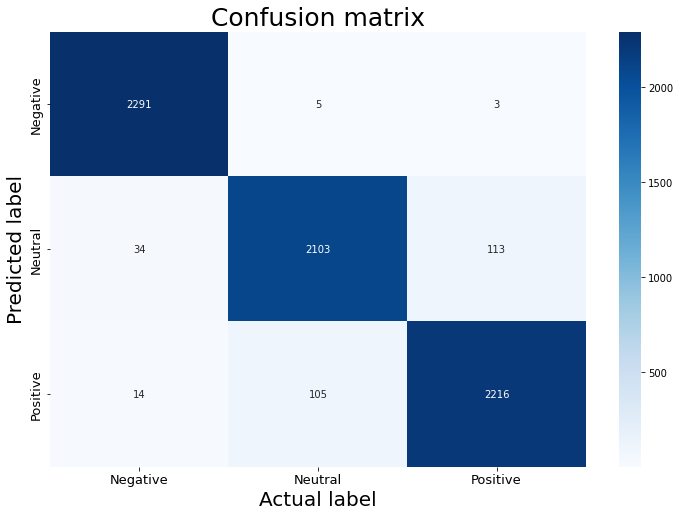

In [ ]:
cm = confusion_matrix(y_test, y_pre)

# plot confusion matrix 
plt.figure(figsize=(12,8))
sentiment_classes = ['Negative', 'Neutral', 'Positive']
sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d', 
            xticklabels=sentiment_classes,
            yticklabels=sentiment_classes)

plt.title('Confusion matrix', 
          fontsize = 25, 
          color = "black")
plt.xticks(size = 13)
plt.yticks(size = 13)
plt.xlabel('Actual label', fontsize=20)
plt.ylabel('Predicted label', fontsize=20)
plt.show()

*   Các điểm thực sự là **Negative** được đánh giá đúng là **Negative** là 2291 tỷ lệ xấp xỉ 97,95% 
*   Các điểm thực sự là **Neutral** được đánh giá đúng là **Neutral** là 2103 tỷ lệ xấp xỉ 95.03%
*   Các điểm thực sự là **Positive** được đánh giá đúng là **Positive** là 2216 tỷ lệ cũng xấp xỉ 95.03%



Sự nhầm lẫn của mô hình rơi vào *Neutral* và *Positive* khi số lượng label thực sự là Neutral nhưng đánh giá là Positive (trên 100 lần sai) tương đối cao và tương tự đối với các label thực sự *Positive* nhưng đánh giá là *Neutral* (trên 100 lần sai). Vậy ta có thể thấy rằng mô hình sẽ cả thiện hơn nếu ta thu thập thêm nhiều các dữ liệu *Neutral* và *Positive*.



#**7. TỔNG KẾT**


*   Dựa vào label , ta xác định được yêu cầu của bài toán là **phân loại**.
*   Việc tiền xử lý dữ liệu cho mô hình ảnh hưởng rất lớn đến kết quả đầu ra của mô hình , các thuật toán mô hình đa phần không thể xử lý hoặc xử lý kém các kiểu dữ liệu văn bản nên trong bài toán trên ta tập trung xử lý giá trị đầu ra của mô hình ( biến *airline_sentiment* ) bằng kỹ thuật *LabelEncoder* cho kiểu dữ liệu phân loại , sau đó ta xử lý đến vector số hoá nội dung của tweet bằng kỹ thuật *TF-IDF* (ngoài ra còn có 1 kỹ thuật phổ biến trong vector hoá nội dung cổ điển là *BoW* (Bag of Words) nhưng khuyết điểm của kỹ thuật này có tính phân loại kém hơn *TF-IDF*).
*   Tiếp đến ta chọn thuật toán cho mô hình , vì bài toán thuộc dạng *phân loại* , có nhiều thuật toán cho việc phân loại tuy nhiên ở đây thuật toán phổ biến được sử dụng là *Random Forest*.
*   Ta thấy có sự mất cân bằng dữ liệu ở mỗi loại airline_sentiment (*negative* có 9178 dòng, *neutral* có 3099 dòng, *positive* có 2363 dòng) , sự chênh lệch số lượng giữa các dòng như vậy sẽ có thể ảnh hưởng đến kết quả đầu ra mô hình. Ta tiến hành kiểm tra và chạy thử mô hình với các tham số mặc định và chưa xử lý mất cân bằng thì kết quả accuracy của mô hình cho ra khoảng *90.52%* . Tuy nhiên ta vẫn muốn có kết quả đầu ra tốt hơn , tiến hành xử lý mất cân bằng bằng cách sinh thêm các dòng dữ liệu mới cân bằng với các dữ liệu bị chênh lệch bằng thuật toán K-Nearest-Neighbors (Vì việc sinh các dữ liệu giống nhau không có ý nghĩa trong việc thống kê) nhờ sự hỗ trợ của hàm *SMOTE* trong thư viện sk-learn , các dữ liệu sau khi cân bằng có số dòng bằng nhau đều là 9178 và sau khi kiểm tra lại mô hình kết quả accuracy đạt được khoảng *95.77%*.Vậy việc cân bằng dữ liệu giúp cho mô hình cải thiện đáng kết (tăng khoảng 5%) cho kết quả accuracy. 
*   Khi chạy mô hình ở trên , ta sử dụng các tham số mặc định của thư viện đặt ra và có thể có các tham số khác cho mô hình có thể sẽ cho kết quả accuracy tốt hơn. Ta tiến hành kiểm tra các tham số muốn thử ở mô hình với sự hỗ trợ của hàm *Random Search* của thư viện sk-learn và kết quả nhận được ở các lần chạy khác nhau rơi vào khoảng *96%* , có sự cải thiện nhỏ tuy nhiên không đáng kể tức là các tham số mặc định của thư viện có thể đã là tham số tốt nhất cho mô hình với bài toán trên.
*   Sau khi đạt kết quả tương đối cao (~ 96%) , ta tiến hành đánh giá mô hình bằng Classification Report và Confusion Matrix . Ta thấy rằng mức độ phân loại của mô hình tương đối tốt (các chỉ số precision , recall và f1-score đều trên 90%) và nhờ vào Confusion Matrix có thể thấy rằng sự nhầm lẫn trong việc phân loại chủ yếu rơi vào  *Neutral* và *Postive* khi số lượng label thực sự là Neutral nhưng đánh giá là Positive (trên 100 lần sai) tương đối cao và tương tự đối với các label thực sự *Positive* nhưng đánh giá là *Neutral* (trên 100 sai). Vậy ta có thể thấy rằng mô hình sẽ cả thiện hơn nếu ta thu thập thêm nhiều các dữ liệu *Neutral* và *Positive*.



**Kết luận** <br>
Vậy ta có thể thấy rằng , mô hình sẽ có kết quả accuracy tương đối tốt (~96%) với các tham số mặc định và với điều kiện ta đã xử lý mất cân bằng dữ liệu (việc cân bằng dữ liệu bằng thuật toán đã giúp tăng accuracy gần 5%) . Mô hình cũng có tính phân loại cao (precision , recall và f1-score đều đạt trên 90%) và những nhầm lẫn , sai sót của mô hình chủ yếu rơi vào việc dự đoán *Neutral* và *Positive* , lí do vì một phần lượng dữ liệu bị chênh lệch khá cao và việc sinh dữ liệu bằng thuật toán có thể không chính xác hoàn toàn , ta có thể cải thiện mô hình bằng phương pháp thu thập thêm các dữ liệu *Neutral* và *Negative* để cân bằng dữ liệu hiện có.